In [3]:
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 
from mpl_toolkits import mplot3d
from scipy.interpolate import RegularGridInterpolator
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [14]:
def phi(x):
    return np.exp((-x**2)/2)/np.sqrt(2*math.pi)

In [26]:
class greeks(object):
    


    def __init__(self,S,K,r,std,T,option,pct,q=None):
        self.S=S
        self.K=K
        self.r=r
        self.q=q
        self.T=T
        self.std=std
        self.option=option
        self.pct=pct
        d1=self.get_d1()
        d2=self.get_d2()
    
    def get_d1(self):
        if self.q==None:
            d1=np.log(self.S/self.K)+(self.r+self.std**2/2)*self.T/(self.std*np.sqrt(self.T))
        else:
            d1=np.log(self.S/self.K)+(self.r-self.q+self.std**2/2)*self.T/(self.std*np.sqrt(self.T))
        return d1


    def get_d2(self):
        if self.q==None:
            d1=(np.log(self.S/self.K)+(self.r+self.std**2/2)*self.T)/(self.std*np.sqrt(self.T))
            d2=d1-self.std*np.sqrt(self.T)
        else:
            d1=(np.log(self.S/self.K)+(self.r-self.q+self.std**2/2)*self.T)/(self.std*np.sqrt(self.T))
            d2=d1-self.std*np.sqrt(self.T)
        return d2

    def phi(x):
        return np.exp((-x**2)/2)/np.sqrt(2*math.pi)



    def get_delta(self):
        d1=self.get_d1()
        if self.q!=None:
            if self.option in ["call",'call']:
                delta=np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)*self.pct
            if self.option in ["put",'put']:
                delta=-np.exp(-self.q*self.T)*stats.norm.cdf(-d1, 0.0, 1.0)*self.pct
        else:
            if self.option in ["call",'call']:
                delta=stats.norm.cdf(d1, 0.0, 1.0)*self.pct
            if self.option in ["put",'put']:
                delta=stats.norm.cdf(-d1, 0.0, 1.0)*self.pct
        
        return delta
    
    def get_vega(self):
        d1=self.get_d1()
        d2=self.get_d2()
        if self.q==None:
            vega=self.S*phi(d1)*np.sqrt(self.T)*self.pct
        else:
            vega=self.S*np.exp(-1*self.q*self.T)*phi(d1)*np.sqrt(self.T)*self.pct
        return vega
    
    def get_theta(self):
        d1=self.get_d1()
        d2=self.get_d2()
        phi(d1)
        if self.q==None:
            if self.option in ["call",'call']:
                theta=(((self.S*phi(d1)*self.std)/(2*np.sqrt(self.T)))-self.r*self.K*np.exp(-1*self.r*self.T)*stats.norm.cdf(d2, 0.0, 1.0)+self.S*np.exp(-self.r*self.T)*stats.norm.cdf(d1, 0.0, 1.0))*self.pct
            if self.option in ["put",'put']:
                theta=(((self.S*phi(d1)*self.std)/(2*np.sqrt(self.T)))+self.r*self.K*np.exp(-1*self.r*self.T)*stats.norm.cdf(-d2, 0.0, 1.0)-self.S*np.exp(-self.r*self.T)*stats.norm.cdf(-d1, 0.0, 1.0))*self.pct
            
        else:
            if self.option in ["call",'call']:
                theta=((-np.exp(-1*self.q*self.T)*((self.S*phi(d1)*self.std)/(2*np.sqrt(self.T)))-self.r*self.K*np.exp(-self.r*self.T)*stats.norm.cdf(d2, 0.0, 1.0)+self.q*self.S*np.exp(-1*self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)))*self.pct
            if self.option in ["put",'put']:
                theta=((-np.exp(-1*self.q*self.T)*((self.S*phi(d1)*self.std)/(2*np.sqrt(self.T)))+self.r*self.K*np.exp(-self.r*self.T)*stats.norm.cdf(-d2, 0.0, 1.0)-1*self.q*self.S*np.exp(-1*self.q*self.T)*stats.norm.cdf(-d1, 0.0, 1.0)))*self.pct

        return theta
    
    def get_rho(self):
        d2=self.get_d2()
        if self.option in ["call",'call']:
            rho=(self.K*self.T*np.exp(-self.r*self.T)*stats.norm.cdf(d2, 0.0, 1.0)/100)*self.pct
        if self.option in ["put",'put']:
            rho=(-self.K*self.T*np.exp(-self.r*self.T)*stats.norm.cdf(-d2, 0.0, 1.0)/100)*self.pct
        return rho

    def get_epsilon(self): 
        d1=self.get_d1()
        d2=self.get_d2()
        if self.q==None:
            print("Error: No dividend typed !")
        else:
            if self.option in ["call",'call']:
                epsilon=(-self.S*self.T*np.exp(-self.q*self.T)*stats.norm.cdf(d2, 0.0, 1.0)/100)*self.pct
            if self.option in ["put",'put']:
                epsilon=(self.S*self.T*np.exp(-self.q*self.T)*stats.norm.cdf(-d1, 0.0, 1.0)/100)*self.pct
        return epsilon
    
    def get_gamma(self):
        d1=self.get_d1()
        d2=self.get_d2()
        gamma=self.K*np.exp(-self.r*self.T)*((phi(d2))/(self.S**2*self.std*np.sqrt(self.T)))*self.pct
        return gamma
    
    def get_vanna(self):
        d1=self.get_d1()
        d2=self.get_d2()
        vanna=(-np.exp(-self.q*self.T)*phi(d1)*(d2/self.std))*self.pct
        return vanna
    
    def get_charm(self):
        d1=self.get_d1()
        d2=self.get_d2()
        if self.option in ["call",'call']:
            charm=((self.q*np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)-np.exp(-self.q*self.T)*phi(d1)*((2*(self.r-self.q)*self.T-stats.norm.cdf(d2, 0.0, 1.0)*self.std*np.sqrt(self.T))/(2*self.T*self.std*np.sqrt(self.T)))))*self.pct    
        if self.option in ["put",'put']:
            charm=((-self.q*np.exp(-self.q*self.T)*stats.norm.cdf(-d1, 0.0, 1.0)-np.exp(-self.q*self.T)*phi(d1)*((2*(self.r-self.q)*self.T-stats.norm.cdf(d2, 0.0, 1.0)*self.std*np.sqrt(self.T))/(2*self.T*self.std*np.sqrt(self.T)))))*self.pct
        return charm

    def get_vomma(self):
        d1=self.get_d1()
        d2=self.get_d2()
        vomma=(self.S*np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)*np.sqrt(self.T)*d1*d2/self.std)*self.pct
        return vomma
    
    def get_veta(self):
        d1=self.get_d1()
        d2=self.get_d2()
        veta=(self.S*np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)*(self.q+(self.r-self.q)*d1/self.std*np.sqrt(self.T)+(1+d1*d2)/2*self.T))*self.pct
        return veta

    def get_speed(self):
        d1=self.get_d1()
        d2=self.get_d2()
        speed=(-np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)/(self.S**2*self.std*np.sqrt(self.T))*(1+d1/(self.std*np.sqrt(self.T))))*self.pct
        return speed
        
    def get_zomma(self):
        d1=self.get_d1()
        d2=self.get_d2()
        zomma=(self.get_gamma()*((d1*d2-1)/self.std))*self.pct
        return zomma
        
                 
    def get_color(self):
        d1=self.get_d1()
        d2=self.get_d2()
        color=(-np.exp(-self.q*self.T)*stats.norm.cdf(d1, 0.0, 1.0)/(2*self.S*self.T)*(2*self.q+1+2*(self.r-self.q)*self.T-d2*self.std*np.sqrt(self.T)*d1/(self.std*np.sqrt(self.T))))*self.pct
        return color
        
    def get_ultima(self):
        d1=self.get_d1()
        d2=self.get_d2()
        ultima=(self.get_vomma()/self.std**2)*(d1*d2*(1-d1*d2)+d1**2+d2**2)
        return ultima
                 
        
    def get_dual_delta(self):
        d1=self.get_d1()
        d2=self.get_d2()
        if self.option in ["call",'call']:
            dual_delta=(-np.exp(self.r*self.T)*stats.norm.cdf(d2, 0.0, 1.0))*self.pct    
        if self.option in ["put",'put']:
            dual_delta=(np.exp(self.r*self.T)*stats.norm.cdf(-d2, 0.0, 1.0))*self.pct

        
    def get_dual_gamma(self):
        d1=self.get_d1()
        d2=self.get_d2()
        dual_gamma=(np.exp(self.r*self.T)*phi(d2)/(self.K*self.std*np.sqrt(self.T)))*self.pct
    
    def get_first_order(self):
        liste=[]
        liste.append("delta: {}; ".format(self.get_delta()))
        liste.append("vega: {}; ".format(self.get_vega()))
        liste.append("theta: {}; ".format(self.get_theta()))
        liste.append("rho: {}; ".format(self.get_rho()))
        liste.append("epsilon: {}; ".format(self.get_epsilon()))
        return liste
    
    def get_second_order(self):
        liste=[]
        liste.append("gamma: {}; ".format(self.get_gamma()))
        liste.append("vanna: {}; ".format(self.get_vanna()))
        liste.append("charm: {}; ".format(self.get_charm()))
        liste.append("vomma: {}; ".format(self.get_vomma()))
        liste.append("veta: {}; ".format(self.get_veta()))
        return liste

    def get_third_order(self):
        liste=[]
        liste.append("speed: {}; ".format(self.get_speed()))
        liste.append("zomma: {}; ".format(self.get_zomma()))
        liste.append("color: {}; ".format(self.get_color()))
        liste.append("ultima: {}; ".format(self.get_ultima()))
        #liste.append("dual delta: {}; ".format(self.get_dual_delta()))
        #liste.append("dual gamma: {}; ".format(self.get_dual_gamma()))
        return liste
    
    def generate_paths(self,nb_paths,nb_steps):
        
        Z = np.random.normal(0.0,1.0,[1,nb_steps])
        X = np.zeros([nb_paths, nb_steps+1])
        W = np.zeros([nb_paths, nb_steps+1])
        time = np.zeros([nb_steps+1])
        
        X[:,0] = np.log(self.S)
        dt = self.T / float(nb_steps)
        
        for i in range(0,nb_steps):
            W[:,i+1]=W[:,i]+np.power(dt, 0.5)*Z[:,i]
            X[:,i+1]=X[:,i]+(self.r-0.5*self.std**2)*dt+self.std*(W[:,i+1]-W[:,i])
            time[i+1]=time[i]+dt

        S = np.exp(X)
        paths = {"time":time,"S":S}
        
        return time,S


    def get_plots(self,nb_paths,nb_steps,pathId):
       
    
        time,S = self.generate_paths(nb_paths=nb_paths,nb_steps=nb_steps)
   

        priceGrid = np.linspace(self.S/100.0,1.5*self.S,50)
        timeGrid = np.linspace(0.02,self.T-0.02,100)
    

        Delta = lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_delta()
        Vega= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_vega()
        Theta= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_theta()
        Rho= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_rho()
        Epsilon= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_epsilon()
        
        Gamma= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_gamma()
        Vanna= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_vanna()
        Charm= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_charm()
        Vomma= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_vomma()
        Veta= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_veta()
        
        Speed= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_speed()
        Zomma= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_zomma()
        Color= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_color()
        Ultima= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_ultima()
        #Dual_delta= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_dual_delta()
        #Dual_gamma= lambda t,s0 : greeks(S=s0,K=self.K,r=self.r,std=self.std,T=t,option=self.option,pct=self.pct,q=0.21).get_dual_gamma()

    
    
        TM = np.zeros([len(timeGrid),len(priceGrid)])
        s0M = np.zeros([len(timeGrid),len(priceGrid)])

        Deltasurface= np.zeros([len(timeGrid),len(priceGrid)])
        Gammasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Vegasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Thetasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Rhosurface = np.zeros([len(timeGrid),len(priceGrid)])
        Epsilonsurface = np.zeros([len(timeGrid),len(priceGrid)])
        
        Vannasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Charmsurface = np.zeros([len(timeGrid),len(priceGrid)])
        Vommasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Vetasurface = np.zeros([len(timeGrid),len(priceGrid)])
        
        Speedsurface = np.zeros([len(timeGrid),len(priceGrid)])
        Zommasurface = np.zeros([len(timeGrid),len(priceGrid)])
        Colorsurface = np.zeros([len(timeGrid),len(priceGrid)])
        Ultimasurface = np.zeros([len(timeGrid),len(priceGrid)])
        #Dual_deltasurface = np.zeros([len(timeGrid),len(priceGrid)])
        #Dual_gammasurface = np.zeros([len(timeGrid),len(priceGrid)])
        
        

        

        for i in range(0,len(timeGrid)):
            TM[i,:]=timeGrid[i]
            s0M[i,:]=priceGrid
            for j in range(0,len(priceGrid)):
                Deltasurface[i,j]=Delta(timeGrid[i],priceGrid[j])
                Vegasurface[i,j]=Vega(timeGrid[i],priceGrid[j])
                Thetasurface[i,j]=Gamma(timeGrid[i],priceGrid[j]) 
                Rhosurface[i,j]= Vega(timeGrid[i],priceGrid[j])
                Epsilonsurface[i,j]=Epsilon(timeGrid[i],priceGrid[j])
                
                Gammasurface[i,j]=Gamma(timeGrid[i],priceGrid[j]) 
                Vannasurface[i,j]=Vanna(timeGrid[i],priceGrid[j])
                Charmsurface[i,j]=Charm(timeGrid[i],priceGrid[j])
                Vommasurface[i,j]=Vomma(timeGrid[i],priceGrid[j])
                Vetasurface[i,j]=Veta(timeGrid[i],priceGrid[j])
                
                Speedsurface[i,j]=Speed(timeGrid[i],priceGrid[j])
                Zommasurface[i,j]=Zomma(timeGrid[i],priceGrid[j])
                Colorsurface[i,j]=Color(timeGrid[i],priceGrid[j])
                Ultimasurface[i,j]=Ultima(timeGrid[i],priceGrid[j])
                #Dual_deltasurface[i,:]=Dual_delta(timeGrid[i],priceGrid)
                #Dual_gammasurface[i,:]=Dual_gamma(timeGrid[i],priceGrid)
                



        '''Delta'''   

        fig = plt.figure(1)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Deltasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Delta surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Deltasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])



        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')

        
    
        '''Vega'''
    
    
        fig = plt.figure(2)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Vegasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Vega surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Vegasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])



        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        '''Theta'''
        
        
        fig = plt.figure(3)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Thetasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Theta surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Thetasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        
        '''Rho'''
        
        fig = plt.figure(4)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Rhosurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Rho surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Rhosurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')




        '''Epsilon'''         
        
        fig = plt.figure(5)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Epsilonsurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Epsilon surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Epsilonsurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')
        
        
        '''Gamma'''
        
        fig = plt.figure(6)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Gammasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Gamma surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Gammasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')
        
        
        
        '''Vanna'''
        
        fig = plt.figure(7)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Vannasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Vanna surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Vannasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')

        
        '''Charm'''
        
        fig = plt.figure(8)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Charmsurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Charm surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Charmsurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        '''Vomma'''
        
        fig = plt.figure(9)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Vommasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Vomma surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Vommasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        '''Veta'''
        
        fig = plt.figure(10)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Vetasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Veta surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Vetasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')
        
        
        
        '''Speed'''
        
        fig = plt.figure(11)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Speedsurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Speed surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Speedsurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])



        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        '''Zomma'''
        
        fig = plt.figure(12)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Zommasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Zomma surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Zommasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


        '''Color'''
        
        fig = plt.figure(13)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Colorsurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Color surface')
        RGI = RegularGridInterpolator((timeGrid[0:],priceGrid),Colorsurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')
                 
        
        '''Ultima'''
        
        fig = plt.figure(14)
        ax = fig.gca(projection='3d')
        ax.plot_surface(TM, s0M, Ultimasurface, cmap=plt.get_cmap('Oranges'))
        plt.xlabel('t')
        plt.ylabel('S(t)')
        plt.title('Ultima surface')
        Finterp = RegularGridInterpolator((timeGrid[0:],priceGrid),Ultimasurface)
        v = np.zeros([len(time),1])
        vTemp = []
        timeTemp = []
        pathTemp = []
        for j in range(5,len(time)):
            if time[j] > timeGrid[0] and time[j] < timeGrid[-1]:
                v[j] = RGI([time[j],S[pathId,j]])
                vTemp.append(RGI([time[j],S[pathId,j]])[0])
                timeTemp.append(time[j])
                pathTemp.append(S[pathId,j])


        ax.plot3D(np.array(timeTemp),np.array(pathTemp),np.array(vTemp), 'black')


 


In [163]:
greeks(S=100,K=95,r=0.08,std=0.25,T=0.5,option="call",pct=1,q=0.21).get_first_order()

['delta: 0.3689689461648407; ',
 'vega: 24.745976170157338; ',
 'theta: -1.608002049371584; ',
 'rho: 0.198115992268369; ',
 'epsilon: -0.1954190003467556; ']

In [164]:
greeks(S=100,K=95,r=0.08,std=0.25,T=0.5,option="call",pct=1,q=0.21).get_second_order()

['gamma: 0.020316952448524418; ',
 'vanna: 0.23226934019703874; ',
 'charm: 0.48676244945024616; ',
 'vomma: 3.948284226324109; ',
 'veta: 20.414977869268665; ']

In [165]:
greeks(S=100,K=95,r=0.08,std=0.25,T=0.5,option="call",pct=1,q=0.21).get_third_order()

['speed: 6.049578107891981e-05; ',
 'zomma: -0.07819318478823703; ',
 'color: -0.004620106478002163; ',
 'ultima: 7.323175813435581; ']

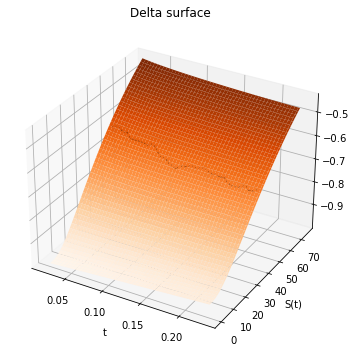

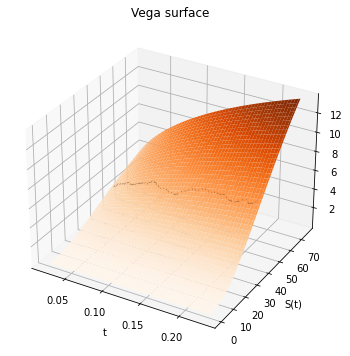

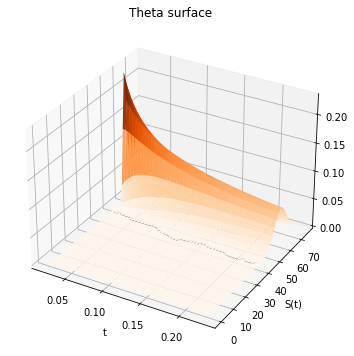

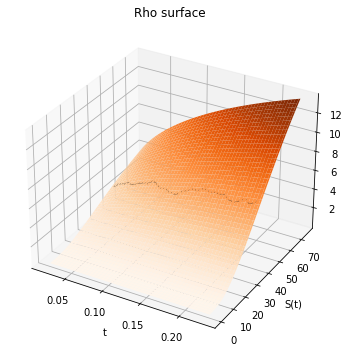

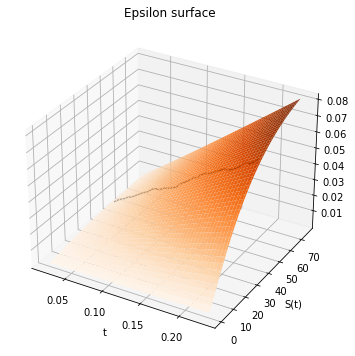

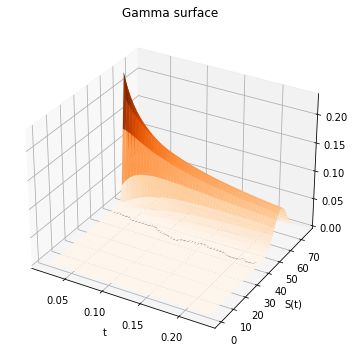

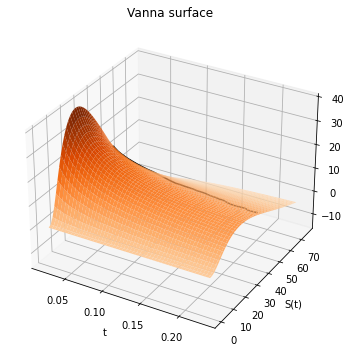

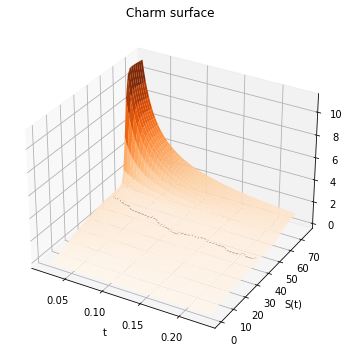

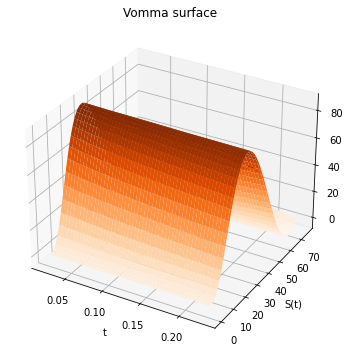

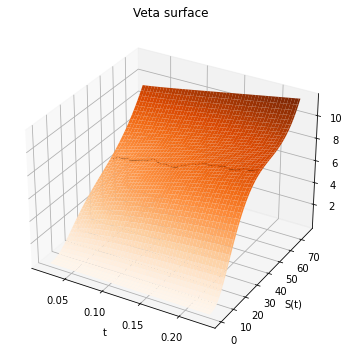

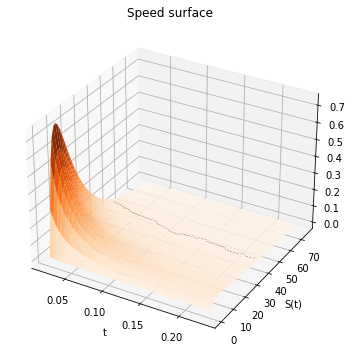

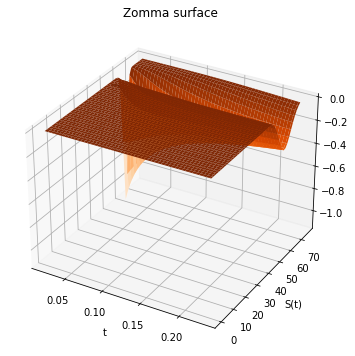

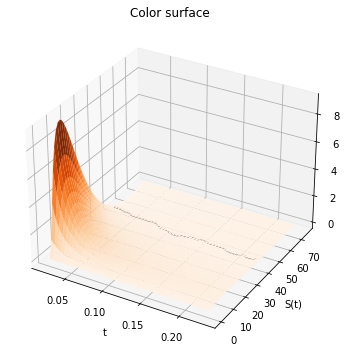

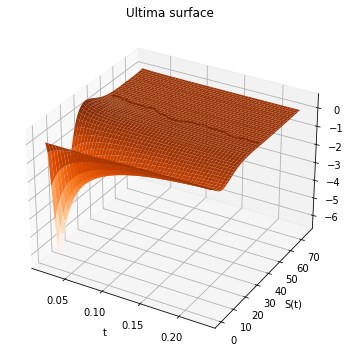

In [168]:
greeks(S=50,K=60,r=0.1,std=0.2,T=0.25,option="put",pct=1,q=0.21).get_plots(nb_paths=20,NoOfSteps=50,pathId=15)